<h2><b>Exploratory Data Analysis - Hotel Bookings Dataset</b></h2>

In [2]:
#Importing required libraries
import pandas as pd
import pandas_profiling 
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.pyplot import pie, axis, show
%matplotlib inline                                                              

import warnings                                                                 # Ignore warning related to pandas_profiling
warnings.filterwarnings('ignore') 


In [3]:
dataset = pd.read_csv("G:\machine_learning\hotel_bookings.csv")
dataset

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.00,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.00,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.00,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.00,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.00,0,1,Check-Out,2015-07-03
5,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.00,0,1,Check-Out,2015-07-03
6,Resort Hotel,0,0,2015,July,27,1,0,2,2,...,No Deposit,NaN,NaN,0,Transient,107.00,0,0,Check-Out,2015-07-03
7,Resort Hotel,0,9,2015,July,27,1,0,2,2,...,No Deposit,303.0,NaN,0,Transient,103.00,0,1,Check-Out,2015-07-03
8,Resort Hotel,1,85,2015,July,27,1,0,3,2,...,No Deposit,240.0,NaN,0,Transient,82.00,0,1,Canceled,2015-05-06
9,Resort Hotel,1,75,2015,July,27,1,0,3,2,...,No Deposit,15.0,NaN,0,Transient,105.50,0,0,Canceled,2015-04-22


<h3><b>Data Profiling</b></h3>
<br>
1. Reviewing the datatypes and sample data to understand what types of data are we dealing with? <br>
2. Which variables to be transformed in some way before analyzing?

In [123]:
dataset.shape

(119390, 34)

In [4]:
dataset.dtypes

hotel                              object
is_canceled                         int64
lead_time                           int64
arrival_date_year                   int64
arrival_date_month                 object
arrival_date_week_number            int64
arrival_date_day_of_month           int64
stays_in_weekend_nights             int64
stays_in_week_nights                int64
adults                              int64
children                          float64
babies                              int64
meal                               object
country                            object
market_segment                     object
distribution_channel               object
is_repeated_guest                   int64
previous_cancellations              int64
previous_bookings_not_canceled      int64
reserved_room_type                 object
assigned_room_type                 object
booking_changes                     int64
deposit_type                       object
agent                             

In [5]:
dataset.head() #Display the first five rows of the dataset

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03


In [6]:
dataset.isnull().sum().sort_values(ascending=False) # Finding out columns containing null values

company                           112593
agent                              16340
country                              488
children                               4
lead_time                              0
arrival_date_year                      0
arrival_date_month                     0
arrival_date_week_number               0
is_canceled                            0
market_segment                         0
arrival_date_day_of_month              0
stays_in_weekend_nights                0
stays_in_week_nights                   0
adults                                 0
babies                                 0
meal                                   0
reservation_status_date                0
distribution_channel                   0
reservation_status                     0
is_repeated_guest                      0
previous_cancellations                 0
previous_bookings_not_canceled         0
reserved_room_type                     0
assigned_room_type                     0
booking_changes 

In [7]:
dataset.describe(include = 'all')

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
count,119390,119390.000000,119390.000000,119390.000000,119390,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,...,119390,103050.000000,6797.000000,119390.000000,119390,119390.000000,119390.000000,119390.000000,119390,119390
unique,2,NaN,NaN,NaN,12,NaN,NaN,NaN,NaN,NaN,...,3,NaN,NaN,NaN,4,NaN,NaN,NaN,3,926
top,City Hotel,NaN,NaN,NaN,August,NaN,NaN,NaN,NaN,NaN,...,No Deposit,NaN,NaN,NaN,Transient,NaN,NaN,NaN,Check-Out,2015-10-21
freq,79330,NaN,NaN,NaN,13877,NaN,NaN,NaN,NaN,NaN,...,104641,NaN,NaN,NaN,89613,NaN,NaN,NaN,75166,1461
mean,NaN,0.370416,104.011416,2016.156554,NaN,27.165173,15.798241,0.927599,2.500302,1.856403,...,NaN,86.693382,189.266735,2.321149,NaN,101.831122,0.062518,0.571363,NaN,NaN
std,NaN,0.482918,106.863097,0.707476,NaN,13.605138,8.780829,0.998613,1.908286,0.579261,...,NaN,110.774548,131.655015,17.594721,NaN,50.535790,0.245291,0.792798,NaN,NaN
min,NaN,0.000000,0.000000,2015.000000,NaN,1.000000,1.000000,0.000000,0.000000,0.000000,...,NaN,1.000000,6.000000,0.000000,NaN,-6.380000,0.000000,0.000000,NaN,NaN
25%,NaN,0.000000,18.000000,2016.000000,NaN,16.000000,8.000000,0.000000,1.000000,2.000000,...,NaN,9.000000,62.000000,0.000000,NaN,69.290000,0.000000,0.000000,NaN,NaN
50%,NaN,0.000000,69.000000,2016.000000,NaN,28.000000,16.000000,1.000000,2.000000,2.000000,...,NaN,14.000000,179.000000,0.000000,NaN,94.575000,0.000000,0.000000,NaN,NaN
75%,NaN,1.000000,160.000000,2017.000000,NaN,38.000000,23.000000,2.000000,3.000000,2.000000,...,NaN,229.000000,270.000000,0.000000,NaN,126.000000,0.000000,1.000000,NaN,NaN


In [8]:
                                                     # Get a quick overview for all the variables using pandas_profiling                                         
profile = pandas_profiling.ProfileReport(dataset)
profile.to_file(outputfile="hoteldatasetInfo.html")     

<b>Observations:</b>

- Size of Dataset:
    - 119390 x 32
    
- Summary of datatypes in the dataset:
    - Numeric: 20 columns
    - Objects: 12 columns

- The following columns contains missing values that may to be addressed
    - <b>agent: </b>There are 16340 missing values which accounts for 13.7% of total rows. This column contains ID of the   travel booking agency.There are two possbilities whether the customer might booked the hotels directly without any travel agency or the missed to include agent Id after booking through an agent.
    - <b>company: </b> There are 112593 missing values which accounts for 94.3% of total rows.This column contains ID of the company/entity that made the booking or responsible for paying the booking.
    - <b>country: </b> There are 488 missing values.
    - <b>children: </b> There are four missing values.
- <b>country</b> and <b>reservation_status_date</b> columns has high cardinality with high distinct values.




<b>Things to perform before analysis:</b><br>
   - The variable <b>company</b> has high number of missing values (94.3%). Hence, this variable could be removed.
   - The records containing missing values in <b>country</b> could be replaced by the mode value of the variable
   - The records containing missing values in <b>children</b> could be replaced with median value of the variable.
  

- <b>Removing the variable "company"</b>

In [9]:
dataset.drop('company',axis=1,inplace=True)

In [10]:
dataset.columns

Index(['hotel', 'is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_month', 'arrival_date_week_number',
       'arrival_date_day_of_month', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'adults', 'children', 'babies', 'meal',
       'country', 'market_segment', 'distribution_channel',
       'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'assigned_room_type', 'booking_changes', 'deposit_type', 'agent',
       'days_in_waiting_list', 'customer_type', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests',
       'reservation_status', 'reservation_status_date'],
      dtype='object')

- <b>Replacing the missing values in the "country" variable with mode</b>

In [11]:
dataset['country'].fillna(dataset['country'].mode, inplace = True)

In [12]:
dataset['country'].isnull().sum()

0

- <b> Replacing the missing values in the "children" variable with mode value</b>

In [13]:
dataset['children'].fillna(dataset['children'].mode, inplace = True)

In [14]:
dataset['children'].isnull().sum()

0

In [10]:
dataset['children'].mode()

0    0.0
dtype: float64

- <h3><b> Questions and Solutions </b></h3>

- <b>Which Hotel have more number of bookings?</b>

Text(0.5,1,'Hotels Booking Distribution')

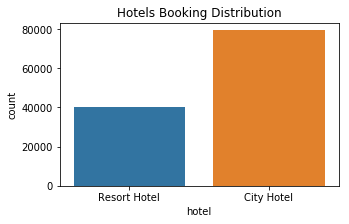

In [4]:
plt.figure(figsize=(5,3))
sns.countplot('hotel', data=dataset)
plt.title('Hotels Booking Distribution')

<b>observations</b>
- City Hotels has more bookings than the resort hotel.

- <b> Which is the best time in a year to book a hotel?</b>

Text(0.5,1,'Month vs No of Bookings')

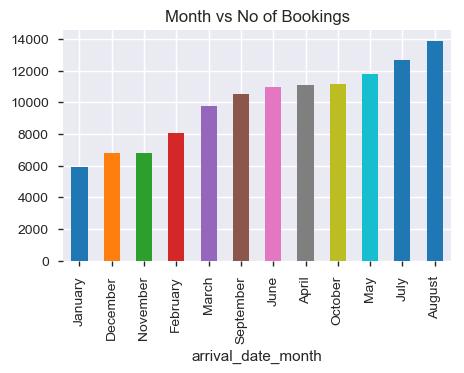

In [55]:
plt.figure(figsize=(5,3))
dataset.groupby(['arrival_date_month'])['hotel'].count().sort_values().plot.bar()
plt.title('Month vs No of Bookings')

<b>Observations</b>
- <b>January</b> has least number of bookings. Also in the following months <b>November, December</b> and <b>January</b> the number of bookings are low. Hence, this might be considered as <b>off season</b> for hotel bookings.
- <b>August</b> has highest number of bookings. Both <b>July</b> and <b>August</b> has more than 12000 bookings. This might be considered as peak season for Hotel bookings and the hotel management should have adequate workforce to cater the demand.

- <b> Which Hotel should concentrate more on having facilities for babies?</b>

Text(0.5,1,'Hotel type vs No of Babies')

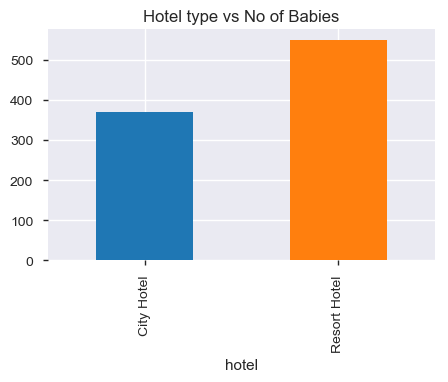

In [56]:
plt.figure(figsize=(5,3))
dataset[dataset['babies'] > 0].groupby('hotel')['hotel'].count().plot.bar()
plt.title('Hotel type vs No of Babies')

<b>Observations</b>
- Bookings made in Resort Hotel has high number of babies. There may be a chance that the families having babies prefer Resort Hotel because of its facilities and privacy. The Resort Hotel should have more facilities for babies like play area, medical facilities, etc 

- <b> By Which market segment the maximum number of bookings made?<b>

Text(0.5,1,'Market segment vs Bookings count')

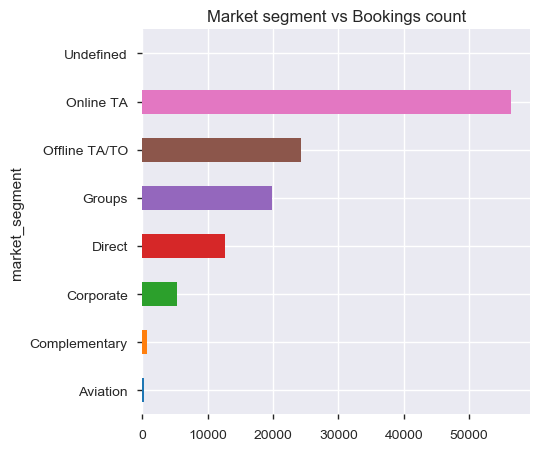

In [21]:
dataset.groupby('market_segment')['hotel'].count().plot.barh(figsize=(5,5))
plt.title('Market segment vs Bookings count')

<b>Observations</b>
 - Most of the bookings are made through Online Travel Agency.

- <b> How many bookings are cancelled?</b>

Text(0,0.5,'Total Count')

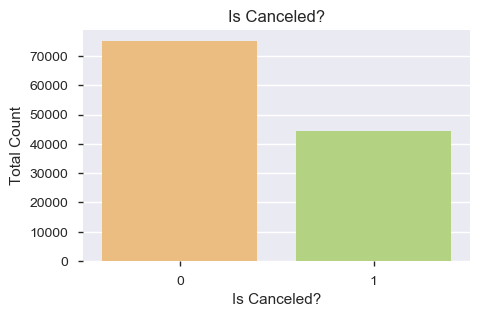

In [58]:
plt.figure(figsize=(5,3))
sns.countplot('is_canceled', data = dataset, palette="RdYlGn")
plt.title('Is Canceled?')
plt.xlabel('Is Canceled?')
plt.ylabel('Total Count')

<b>Observations</b>
- More than 40000 bookings have been cancelled which accounts for almost 1/3rd of total bookings.

-<b> Which method/platform is mostly used for hotel bookings?</b>

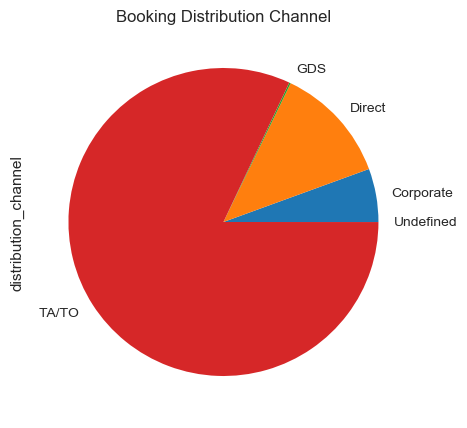

In [23]:
dataset.groupby('distribution_channel')['distribution_channel'].count().plot.pie(title='Booking Distribution Channel', figsize=(5, 5))

<b>Observations</b>
   - Most of the bookings are made through Travel Agency/ Tour Operator

- <b> What is the average duration of stay in the hotels?

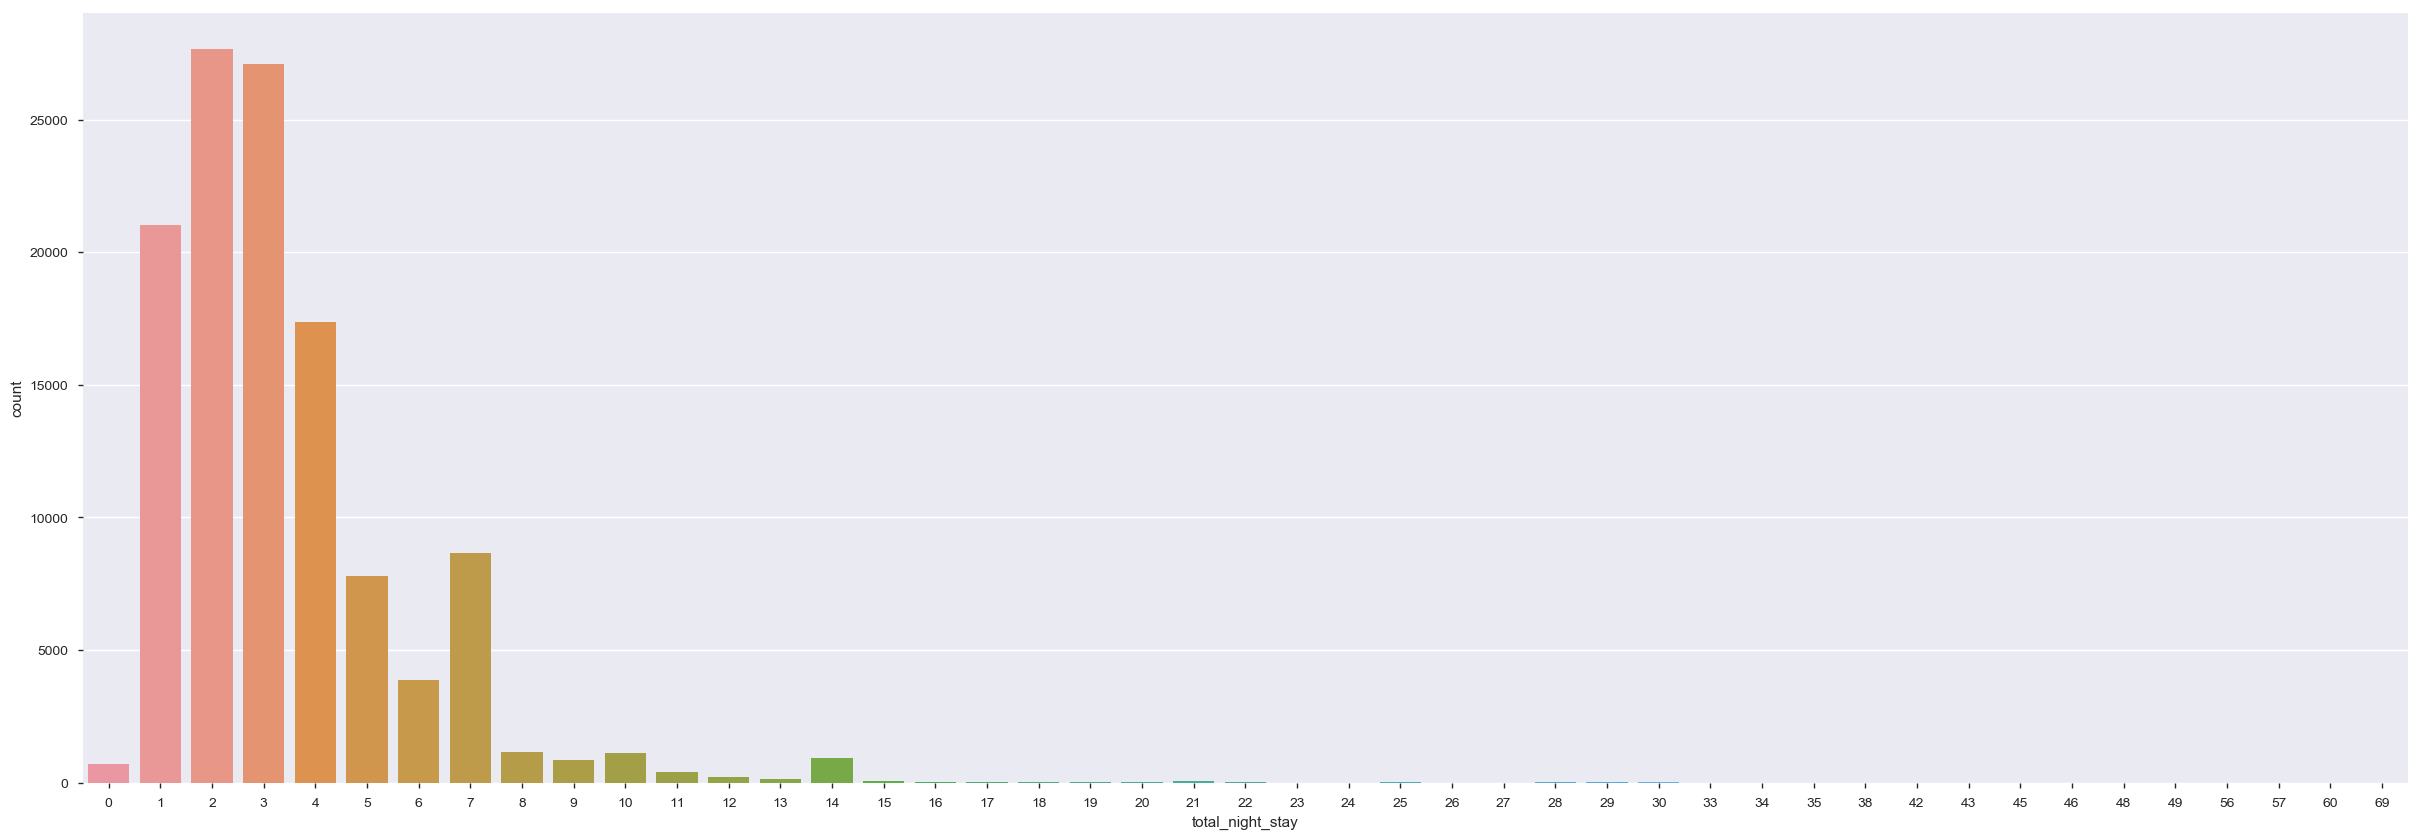

In [24]:
dataset['total_night_stay'] = dataset['stays_in_weekend_nights'] + dataset['stays_in_week_nights']
plt.figure(figsize=(30,10))
sns.countplot('total_night_stay', data = dataset) 


<b>Observations</b>
 - Most of them stayed for 1-4 nights on average


- <b> Do bookings cancellation impacted by any other factors?</b>

In [127]:
dataset['lead_time'].max()
dataset['lead_time_group'] = pd.cut(dataset['lead_time'].dropna(),
                         [0,100,200,300,400,500,600,700],
                         labels=['<100','100-200','200-300','300-400','400-500', '500-600','700+'], include_lowest=True)

Text(0,0.5,'Cancellation Count')

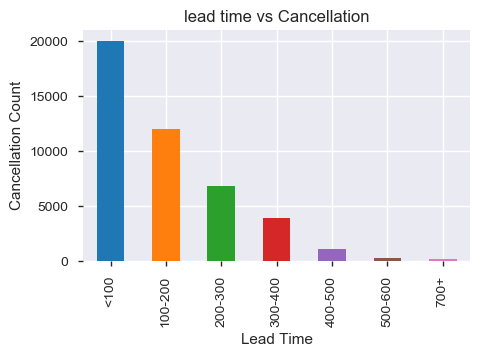

In [128]:
plt.figure(figsize=(5,3))
dataset_filtered = dataset[dataset['is_canceled'] == 1]
dataset_filtered.groupby('lead_time_group')['hotel'].count().plot.bar(title = 'lead time vs Cancellation')
plt.xlabel('Lead Time')
plt.ylabel('Cancellation Count')

Text(0.5,1,'Deposit Type vs Cancellation Count')

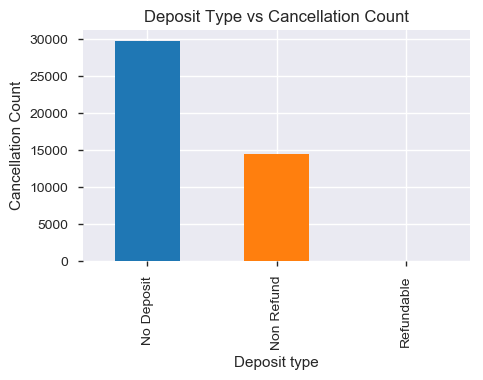

In [27]:
plt.figure(figsize=(5,3))
dataset_filtered.groupby('deposit_type')['hotel'].count().plot.bar()
plt.xlabel("Deposit type")
plt.ylabel("Cancellation Count")
plt.title("Deposit Type vs Cancellation Count")

Text(0.5,1,'Previous Cancellation vs count')

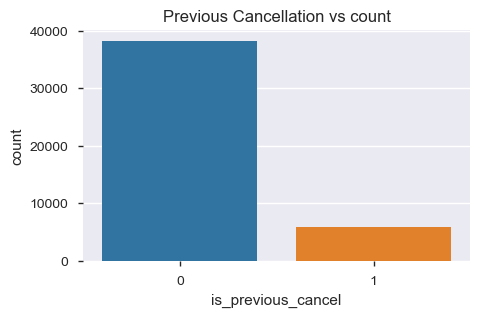

In [108]:
dataset_filtered_1 = dataset[dataset['is_canceled'] == 1] # Filtering those who have previous cancellation history

def is_previous_cancel(row):
    if row['previous_cancellations'] > 0:
        return 1
    elif row['previous_cancellations'] <= 0:
        return 0

plt.figure(figsize=(5,3))
dataset_filtered_1['is_previous_cancel'] = dataset_filtered_1.apply(lambda row: is_previous_cancel(row), axis = 1)
sns.countplot('is_previous_cancel', data  = dataset_filtered_1)
plt.title("Previous Cancellation vs count")

<b>Observations</b>
 - Most of the cancellations are from people who have booked the hotels with in 100 days before the arrival day. So, People who have booked the tickets well in advance are less likely to cancel their tickets.
 - Also, people who didn't deposit any amount at the time of booking are more likely to cancel their bookings.
 - Among those who cancelled the bookings, almost 38000 bookings out of 44224 doesn't have previous cancellation history.

- <b>Does the guest have revisited the hotels again?</b>

Text(0.5,1,'Is repeated? vs Count')

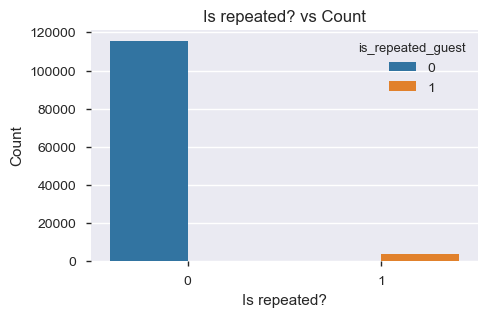

In [28]:
plt.figure(figsize=(5,3))
sns.countplot('is_repeated_guest', data = dataset, hue = 'is_repeated_guest')
plt.xlabel("Is repeated?")
plt.ylabel("Count")
plt.title("Is repeated? vs Count")


<b>Observations</b>
 - Very few number of guests are repeated. The Hotels could concentrate more on attracting the people to revist again.

- <b> What type of meals combo was highly preferred by the people?

Text(0,0.5,'Count')

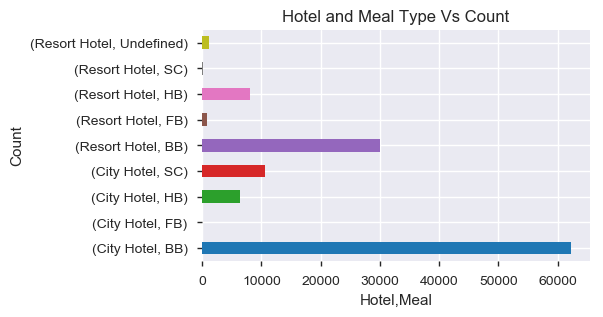

In [38]:
plt.figure(figsize=(5,3))
dataset.groupby(['hotel','meal'])['hotel'].count().plot.barh(title='Hotel and Meal Type Vs Count')
plt.xlabel("Hotel,Meal")
plt.ylabel("Count")

<b>Observations</b>
 - Most of the people prefer 'BB' type of meals in Both City and Resort Hotel.
 - Also Very few people prefer 'No meal package' in Resort Hotel. So, Most of them prefer meals in Resort Hotel.

- <b>Did most of the people didn't showed up on the check-in date?</b>

Text(0.5,1,'Reservation Status vs Count')

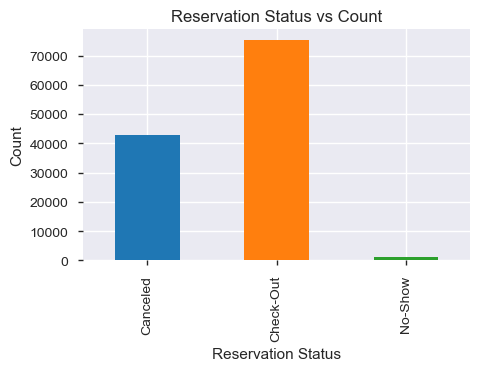

In [52]:
plt.figure(figsize=(5,3))
dataset.groupby('reservation_status')['hotel'].count().plot.bar()
plt.xlabel("Reservation Status")
plt.ylabel("Count")
plt.title("Reservation Status vs Count")

<b>Observations</b>
 - No, Only very few Bookings less than 3000 didn't showed up on the check-in date.

- <b>Which type of customers made most bookings?</b>

In [62]:
pd.crosstab(dataset['hotel'],dataset['customer_type'], margins=True)

customer_type,Contract,Group,Transient,Transient-Party,All
hotel,,,,,
City Hotel,2300,293,59404,17333,79330
Resort Hotel,1776,284,30209,7791,40060
All,4076,577,89613,25124,119390


<b>Observations</b>
 - In Both Hotels, Transient customer type has made most number of bookings.

- <b> Which season witnessed higher ADR (Average Daily Rate)?</b>

<Figure size 3000x300 with 0 Axes>

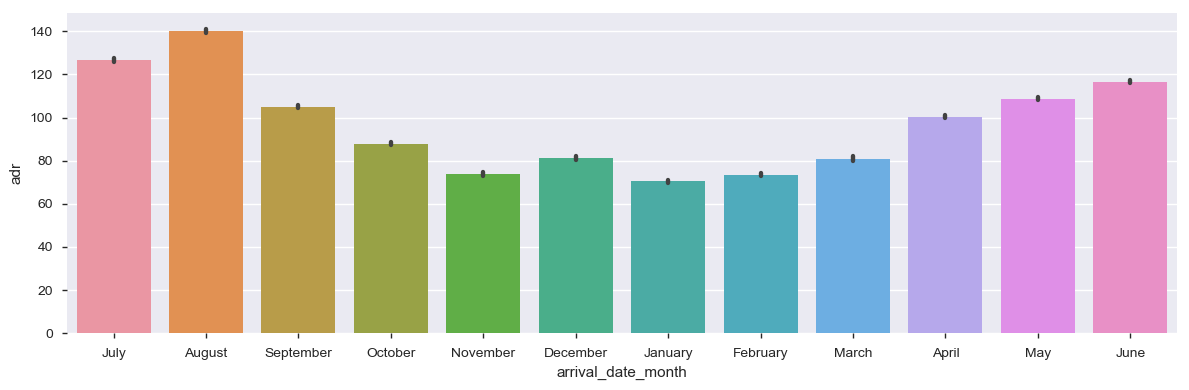

<Figure size 3000x300 with 0 Axes>

In [93]:

sns.catplot(x='arrival_date_month',y='adr',kind='bar',data = dataset, height = 4, aspect = 3)
plt.figure(figsize=(30,3))

<b>Observation</b>
 - It could be observed that Average Daily Rate is high during June to August and low during November to December.

- <b> Which type of room is preferred by people at the time of booking?</b>

Text(0,0.5,'Count')

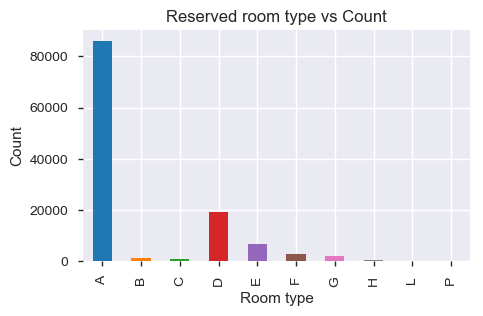

In [116]:
plt.figure(figsize=(5,3))
dataset.groupby('reserved_room_type')['hotel'].count().plot.bar()
plt.title('Reserved room type vs Count')
plt.xlabel('Room type')
plt.ylabel('Count')


<b>Observations</b>
 - Room type 'A' is preferred by most of the people.

-<b> Does everyone has been allocated same room type chosen by them at the time of booking during their check-in's ?

In [122]:
dataset['reserved_assigned_status'] = (dataset['reserved_room_type']==dataset['assigned_room_type']).astype(int)
pd.crosstab(dataset['hotel'],dataset['reserved_assigned_status'], margins=True)

reserved_assigned_status,0,1,All
hotel,,,
City Hotel,7192,72138,79330
Resort Hotel,7725,32335,40060
All,14917,104473,119390


<b>Observations</b>
 - In City Hotel, 9% of the bookings didn't get alloted to the same room type at the time of check-in.
 - In Resort Hotel, 19% of the bookings didn't get alloted to the same room type at the time of check-in. 
 - The Hotels need to take necessary steps to allocate preferred room type to the customers as it would avoid un necessary distress among the customers and also helps them to earn customer's trust.